In [13]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=1)
plt.use('pgf')

plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=1)
plt.use('pgf')

FONT_SIZE = 21

params = {
    "lines.markersize": 20,
    "lines.linewidth": 3,
#     "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE,
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    "legend.fontsize": FONT_SIZE,
#     "pgf.preamble":[r"\usepackage[utf8x]{inputenc}", r"\usepackage[T1]{fontenc}"]
}
plt.rcParams.update(params)
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/published/ml-workload-optimization/experiment_results/remote'

SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]
OTHER_COLOR = sns.color_palette()[2]

WORKLOADS = {
    'start_here_a_gentle_introduction': '(a) Workload 1',
    'introduction_to_manual_feature_engineering': '(b) Workload 2',
    'introduction_to_manual_feature_engineering_p2': '(c) Workload 3'
}

output_directory = '/Users/bede01/Documents/work/phd-papers/published/ml-workload-optimization/slides/assets/medium-figures'


def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise


def savefig(filename):
    #     plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.png'.format(filename), bbox_inches='tight')

In [14]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/repetition/kaggle_home_credit'
FINAL_RESULT_FILE = result_folder + '/cloud-41/2019-10-20/09-36.csv'
result_file = result_folder + '/cloud-41/2020-02-05/22-43.csv'

In [15]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload','type', 'rep', 'mat_rate',
    'run_time'
]
method_map = {'optimized':'CO','baseline':'KG', 'helix':'HL'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['type'] = execution_times['type'].replace(method_map)
execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id','workload','type'])['run_time'].apply(lambda x: x.cumsum())
execution_times['run_time'] = execution_times['run_time'] / 60.0

In [16]:
execution_times = execution_times[execution_times.type != 'HL']

In [17]:
def plot_run_time(df):
    cat = sns.barplot(
        data=df,
        x='rep',
        y='run_time',
        hue='type',
        errwidth=3,
        errcolor='0',
        ci='sd',
        hue_order=['CO', 'KG'],
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
#             'HL': sns.color_palette()[2]
        })
    top = df['run_time'].max()
    cat.set_xlabel('')
    cat.set_ylabel('Run Time (m)')
    if top < 4:
        cat.set_yticks([0,1,2,3,4])
        cat.set_ylim(0, 4)
    else:
        cat.set_yticks([0,2,4,6,8])
        cat.set_ylim(0, 8)
    cat.set_xticklabels(['Run 1', 'Run 2'])

    num_executions = len(df.rep.unique())
    for i, bar in enumerate(cat.patches):
        if i < num_executions:
            h = '//'
        elif i < 2 * num_executions:
            h = '\\\\'
        else:
            h = '--'
        bar.set_edgecolor('black')
        bar.set_hatch(h)
#     ax.tick_params(axis='y', which='major', pad=-2)
#     ax.tick_params(axis='x', which='major', pad=-2)

    legend = cat.legend(
        borderpad=0.2,
        frameon=True,
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        ncol=3,
        columnspacing=0.2,
        bbox_to_anchor=(0.5, 1.22))
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(2.0)

    return cat

In [18]:
path = output_directory

<Figure size 432x288 with 0 Axes>

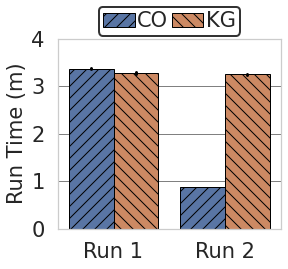

In [19]:
plt.clf()
fig = plt.figure(figsize=(4,3.5))
df = execution_times[execution_times['workload'] == 'start_here_a_gentle_introduction']
p1= plot_run_time(df)
savefig(path+'/workload-1')

<Figure size 432x288 with 0 Axes>

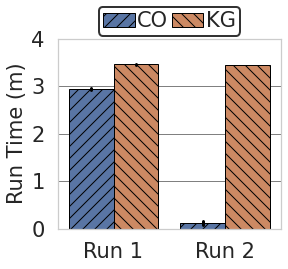

In [20]:
plt.clf()
fig = plt.figure(figsize=(4,3.5))
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering']
p1= plot_run_time(df)
savefig(path+'/workload-2')

<Figure size 432x288 with 0 Axes>

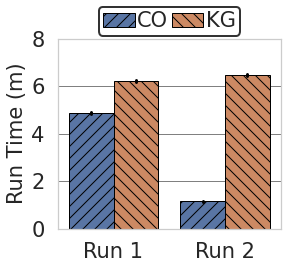

In [21]:
plt.clf()
fig = plt.figure(figsize=(4,3.5))
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering_p2']
p1= plot_run_time(df)
savefig(path+'/workload-3')